> 再重复一次, react element就是js object, 所谓的DOM就是DOM tree, 就是好多node组成的节点, 获得node的方法比如`document.getElementById()`, 所以node也是js object, 大部分node都是HTML element=DOM element, 名字有好多个而已. 所以react element和node就算是一一对应的. 

---


React里有两个tree:

- React DOM tree(virtual tree)由js object组成
- DOM tree(real tree)由node组成 

React element(js object)代表HTML element(div, button, image), 就是说用js object来操作html element. 

DOM中有个概念叫node, 其中`comment`和各种tag(`div`, `button`, `p`)都是node, 只是type不同, 网页渲染的第一步就是构建的node tree(DOM tree). 这个DOM tree根结点就是`<html>`(被称为root node), 然后html节点有两个儿子`body`和`head`node. 

---

## Rendering an Element into the DOM

Let’s say there is a `<div>` somewhere in your HTML file:
```js
<div id="root"></div>
```
We call this a `root DOM node` because everything inside it will be managed by `React DOM`.

Applications built with just React usually have a single root DOM node. To render a `React element`, first pass the `DOM element(HTML element)` to `ReactDOM.createRoot()`, then pass the `React element` to `root.render()`:

```js
const root = ReactDOM.createRoot(
  document.getElementById('root')
);
const element = <h1>Hello, world</h1>;
root.render(element);
```

上面这段代码就是首先把DOM element(HTML element)`document.getElementById('root')`传给`ReactDOM.createRoot()`以创建react中的root节点, 然后再把react element传给react的render方法, 去渲染. 

所以, 思路很清晰, **react通过实现自己的element, tree与DOM中的node(`document.getElementById('root')`), tree对应, 从而达到使用JSX expression方便生成DOM element的目的**. 

关于DOM tree: https://medium.com/jspoint/how-the-browser-renders-a-web-page-dom-cssom-and-rendering-df10531c9969

---

下面这两句话分别介绍的是HTML element和React element, 很奇怪都是js object, 现在还是没办法理解其中的关系.

When the browser reads HTML code, whenever it encounters an HTML element like `html`, `body`, `div` etc., it(browser) creates a JavaScript object called a Node. Eventually, all HTML elements will be converted to JavaScript objects.

**These objects(由`React.createElement()`获得) are known as `React elements`, but they are just plain JavaScript objects**. They represent `HTML elements`, and they do not live on the page (the “real” DOM)—they live on the `virtual DOM`. So we’ll have trees of objects on the `virtual DOM` and trees of objects on the `real DOM`. React automatically updates the associated DOM element when we change data on a React element.  关于DOM可以参考`MyNotes/frontend/front basics/网页渲染过程`.

我想现在可以理清其中的关系了, 上面第一段说html element会被转换成js object, 就是下面我们经常用的这些表达式:

```js
// 现在html的element不就是被转换成了js的object了吗
const submit = document.getElementById('button');
```

至于第二段, react element, 就是js object这毫无疑问, 本来react就是用js实现的. 

# Updating the Rendered Element
---

> **React elements are immutable**. Once you create an element, you can’t change its children or attributes. An element is like a single frame in a movie: it represents the UI at a certain point in time.

With our knowledge so far, the only way to update the UI is to create a new element, and pass it to `root.render()`.

实现了一个电子表:
```js
const ReactDOM  = require('react-dom/client');
const root = ReactDOM.createRoot(
    document.getElementById('root')
);

function tick() {
    const element = (
        <div>
            <h2>It is {new Date().toLocaleTimeString()}.</h2>
        </div>
    );
    // 每隔一秒就会创建一个新的element传给render function
    root.render(element);
}

setInterval(tick, 1000);
```

> **Note**: In practice, most React apps only call `root.render()` once. In the next sections we will learn how such code gets encapsulated into [stateful components](https://reactjs.org/docs/state-and-lifecycle.html).

# React Only Updates What’s Necessary

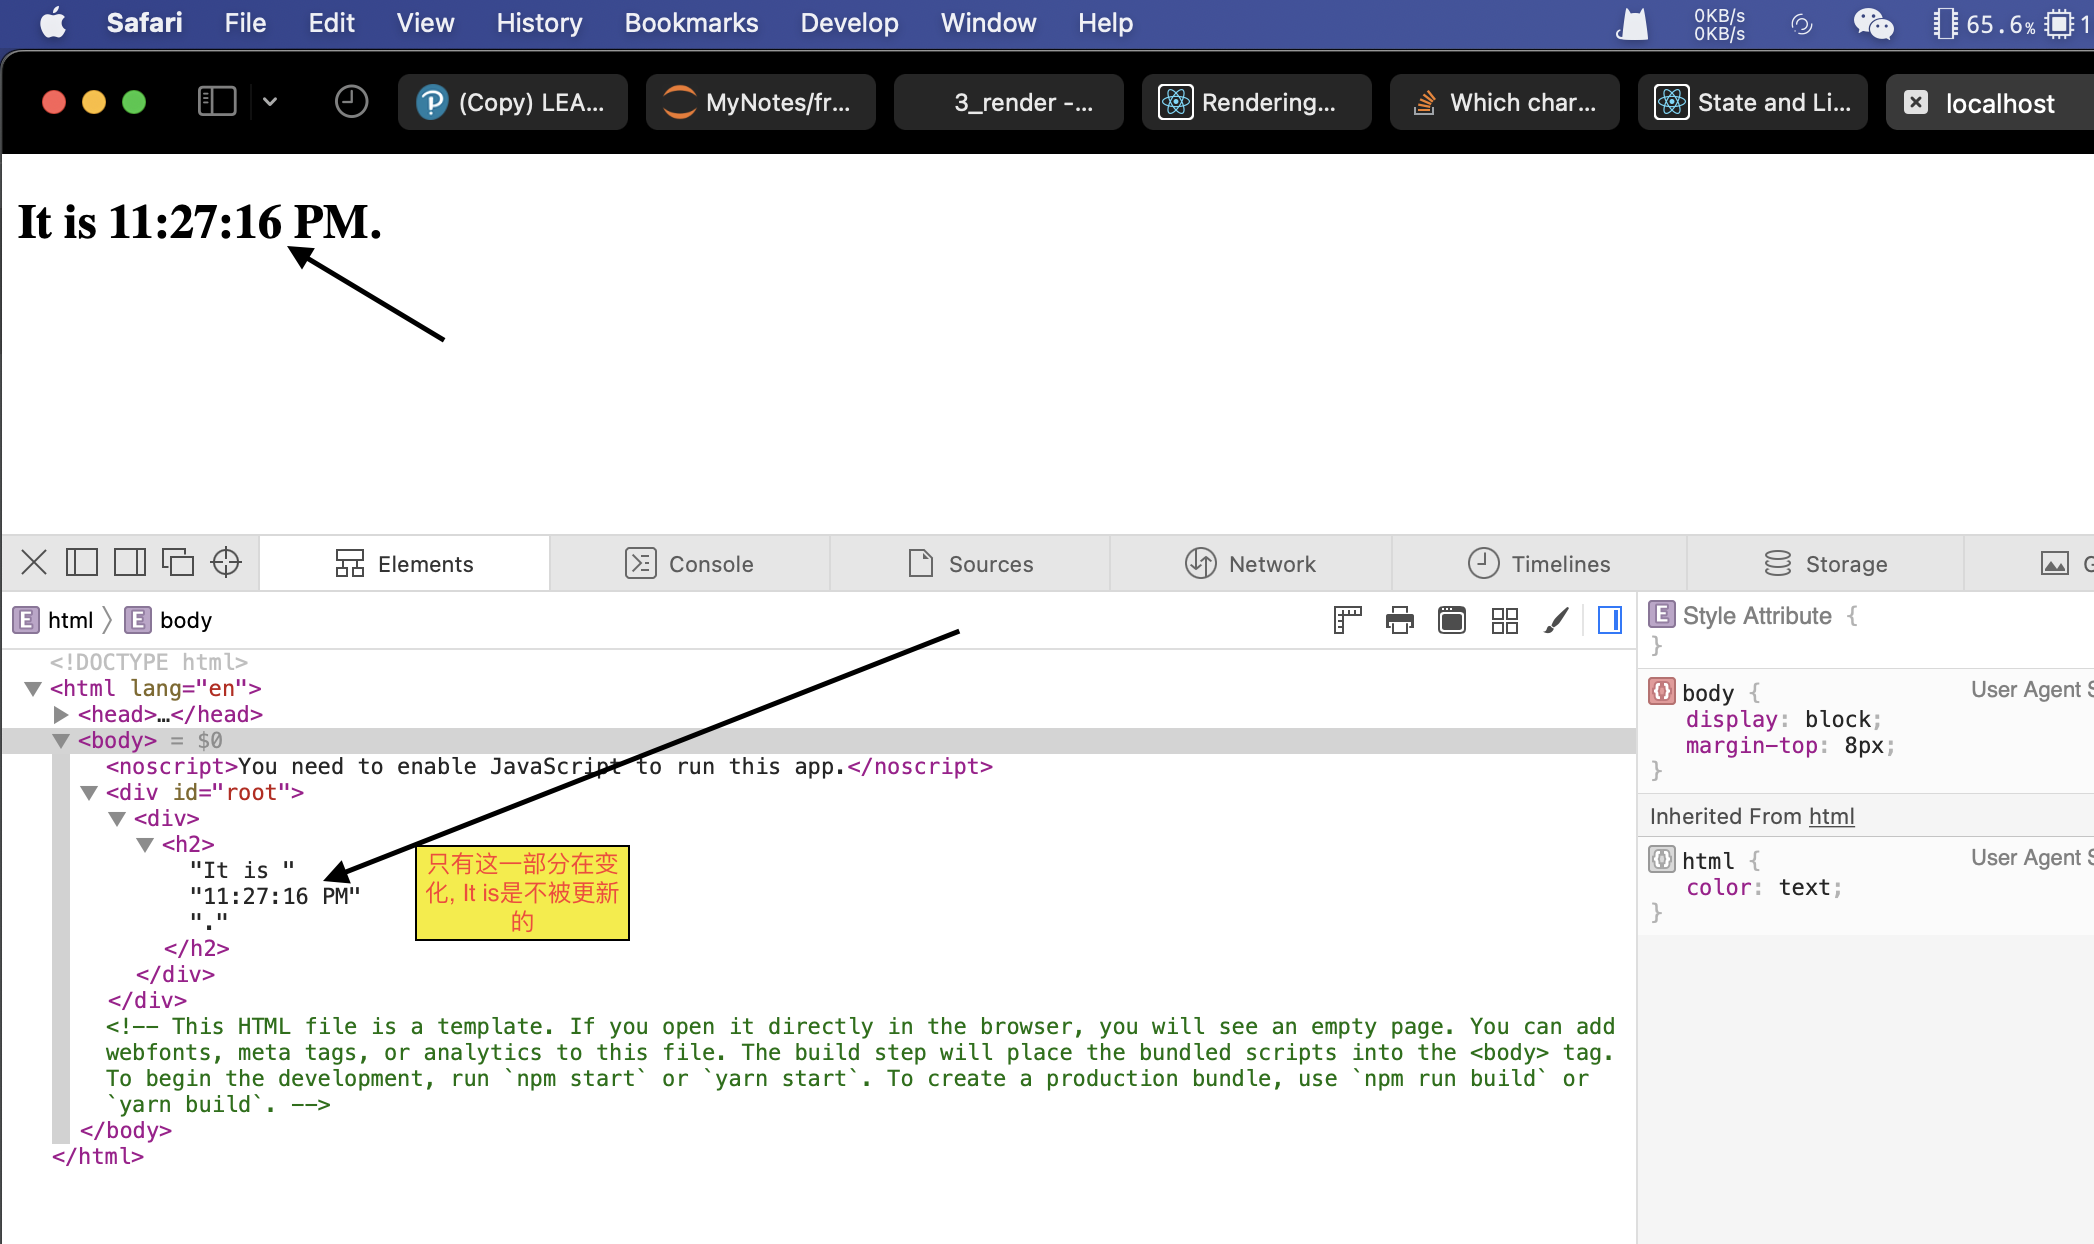

因为无法插入视频, 请参考: https://reactjs.org/docs/rendering-elements.html